In [1]:
import pandas as pd
import sqlite3 as sql
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
ch_data=pd.read_csv('datasets/Census_DatasocioeconomicChicago.csv')
ch_data

,CommunityAreaNumber,COMMUNITYAREANAME,PERCENTOFHOUSINGCROWDED,PERCENTHOUSEHOLDSBELOWPOVERTY,PERCENTAGED16+UNEMPLOYED,PERCENTAGED25+WITHOUTHIGHSCHOOLDIPLOMA,PERCENTAGEDUNDER18OROVER64,PERCAPITAINCOME,HARDSHIPINDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


# database connection 

In [52]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [53]:
cnn=sql.connect('socioeconomic.db')

In [54]:
%sql sqlite:///socioeconomic.db

In [57]:
ch_data.to_sql('chicago',cnn)

78

In [58]:
ch_data.columns

Index(['CommunityAreaNumber', 'COMMUNITYAREANAME', 'PERCENTOFHOUSINGCROWDED',
       'PERCENTHOUSEHOLDSBELOWPOVERTY', 'PERCENTAGED16+UNEMPLOYED',
       'PERCENTAGED25+WITHOUTHIGHSCHOOLDIPLOMA', 'PERCENTAGEDUNDER18OROVER64',
       'PERCAPITAINCOME', 'HARDSHIPINDEX'],
      dtype='object')

In [56]:
%%sql
-- select * from chicago limit 5;
drop table chicago

 * sqlite:///socioeconomic.db
Done.


[]

Problem 1
How many rows are in the dataset?

In [20]:
%%sql
select count(*) from chicago

 * sqlite:///socioeconomic.db
Done.


count(*)
78


Problem 2
How many community areas in Chicago have a hardship index greater than 50.0?

In [22]:
%%sql
select count(distinct communityareaname) from chicago where hardshipindex >50

 * sqlite:///socioeconomic.db
Done.


count(distinct communityareaname)
38


In [23]:
%%sql
select max(hardshipindex) from 

 * sqlite:///socioeconomic.db
Done.


max(hardshipindex)
98.0


In [24]:
%%sql
select communityareaname from chicago where hardshipindex=(select max(hardshipindex) from chicago)

 * sqlite:///socioeconomic.db
Done.


COMMUNITYAREANAME
Riverdale


In [59]:
%%sql
select * from chicago where PERCAPITAINCOME  > 60000

 * sqlite:///socioeconomic.db
Done.


index,CommunityAreaNumber,COMMUNITYAREANAME,PERCENTOFHOUSINGCROWDED,PERCENTHOUSEHOLDSBELOWPOVERTY,PERCENTAGED16+UNEMPLOYED,PERCENTAGED25+WITHOUTHIGHSCHOOLDIPLOMA,PERCENTAGEDUNDER18OROVER64,PERCAPITAINCOME,HARDSHIPINDEX
5,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
6,7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
7,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
31,32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0


In [75]:
# income_vs_hardship=%sql select percapitaincome, hardshipindex from chicago 
# income_vs_hardship=pd.DataFrame(income_vs_hardship).dropna()
income_vs_hardship['PERCAPITAINCOME']

0     23939
1     23040
2     35787
3     37524
4     57123
      ...  
72    19713
73    34381
74    27149
75    25828
76    33385
Name: PERCAPITAINCOME, Length: 77, dtype: int64

<Axes: xlabel='PERCAPITAINCOME', ylabel='HARDSHIPINDEX'>

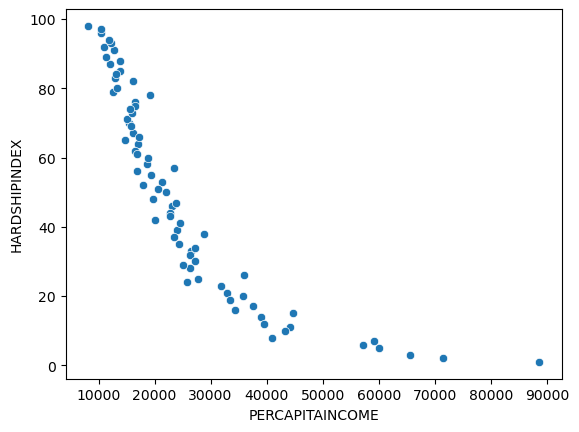

In [78]:
sns.scatterplot(x='PERCAPITAINCOME',y='HARDSHIPINDEX', data=income_vs_hardship)